In [2]:
import os
import numpy as np
import imageio
import math as m
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import colors as mcolors
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import cv2
# %matplotlib inline
%matplotlib notebook

import scipy.io as sio

In [1129]:
def fig2data(fig):
    """
    @brief Convert a Matplotlib figure to a 4D numpy array with RGBA channels and return it
    @param fig a matplotlib figure
    @return a numpy 3D array of RGBA values
    """
    # draw the renderer
    fig.canvas.draw()

    # Get the RGBA buffer from the figure
    w, h = fig.canvas.get_width_height()
    buf = np.fromstring(fig.canvas.tostring_argb(), dtype=np.uint8)
    buf.shape = (w, h, 4)

    # canvas.tostring_argb give pixmap in ARGB mode. Roll the ALPHA channel to have it in RGBA mode
    buf = np.roll(buf, 3, axis=2)[:,:,:3]
    return buf

def show_images(images, step, path_to_save, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.

    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.

    cols (Default = 1): Number of columns in figure (number of rows is 
                      set to np.ceil(n_images/float(cols))).

    titles: List of titles corresponding to each image. Must have
          the same length as titles.
    """
    assert((titles is None) or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    fig_img = fig2data(fig)
    plt.savefig(path_to_save+"/results_"+str(step)+".jpg")
    # plt.show()
    plt.close(fig)
    return fig_img



# limb_parents = [0, 0, 1, 2, 3, 1, 5, 6, 1, 0, 9, 10, 11, 0, 13, 14, 15]
limb_parents = [0, 0, 1, 2, 3, 1, 5, 6, 1, 0, 9, 10, 0, 12, 13]

def get_figure():           
    fig = plt.figure(frameon=False, figsize=(8, 8))
    fig.clf()
    return fig


def fig2rgb_array(fig, expand=True):
    fig.canvas.draw()
    buf = fig.canvas.tostring_rgb()
    ncols, nrows = fig.canvas.get_width_height()
    shape = (nrows, ncols, 3) if not expand else (1, nrows, ncols, 3)
    return np.fromstring(buf, dtype=np.uint8).reshape(shape)


def figure_to_summary(fig, iteration_no,  train_writer, vis_summary, vis_placeholder, mode=None):
    image = fig2rgb_array(fig)

    # print(" gg", vis_placeholder)

    # if mode=='test':
    #     test_writer.add_summary(vis_summary.eval(feed_dict={vis_placeholder: image}), global_step= iteration_no )
    # else:    
    train_writer.add_summary(vis_summary.eval(feed_dict={vis_placeholder: image}), global_step= iteration_no )
    plt.close(fig)

def draw_limbs_3d_plt(joints_3d, ax, limb_parents=limb_parents, z_flip = True):
    for i in range(joints_3d.shape[0]):
#         plt.text(i, (joints_3d[i, 0], joints_3d[i, 0]), str(i))
#         ax.text(joints_3d[i, 0], joints_3d[i, 1], joints_3d[i, 2], s=str(i))
        x_pair = [joints_3d[i, 0], joints_3d[limb_parents[i], 0]]
        y_pair = [joints_3d[i, 1], joints_3d[limb_parents[i], 1]]
        z_pair = [joints_3d[i, 2], joints_3d[limb_parents[i], 2]]
        ax.scatter(x_pair[0], y_pair[0], z_pair[0], c='black', s=30)
        ax.scatter(x_pair[1], y_pair[1], z_pair[1], c='black', s=30)
        ax.plot(x_pair, y_pair, z_pair, color=clrs[i]/255.0, linewidth=3, antialiased=True)
#         if z_flip:
#             ax.plot(z_pair, x_pair, y_pair, linewidth=3, antialiased=True)
#         else:
#             ax.plot(x_pair, y_pair,z_pair, linewidth=3, antialiased=True)
#         dist = np.sqrt(np.square(x_pair[0]-x_pair[1]) + np.square(y_pair[0]-y_pair[1]) + np.square(z_pair[0]-z_pair[1]))
#         print ("distance ", i, "<->", limb_parents[i], " = ", dist)
#     ax.view_init(50, 210)    

def get_ax(joints_3d, fig, az=0, ele=10, subplot='111'):
    ax = fig.add_subplot(subplot, projection='3d')

    lim = np.max(np.abs(joints_3d))
#     print("lim", lim)
    ax.view_init(azim=az, elev=ele)
    
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)
    ax.set_zlim(-lim, lim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
    grid = False
    if grid == False:
        ax.axis('off')
        ax.grid(False)
    
    return ax

def get_skeleton_plot(joints_3d, ax, limb_parents=limb_parents, title="", z_flip=True):
#     fig = plt.figure(frameon=False, figsize=(7, 7))
    draw_limbs_3d_plt(joints_3d, ax, limb_parents, z_flip=False)
    plt.title(title)


def plot_skeleton(joints_3d, ax, limb_parents=limb_parents, title="", z_flip=True):
    get_skeleton_plot(joints_3d, ax, limb_parents, title, z_flip=z_flip)

In [45]:
limb_parents = [0, 0, 1, 2, 3, 1, 5, 6, 1, 0, 9, 10, 11, 0, 13, 14, 15]
# limb_parents = [0, 0, 1, 2, 3, 1, 5, 6, 1, 0, 9, 10, 0, 12, 13]

clrs = np.array([[175,25,240],                             #1
   [25,128,128],[75,180,80],[170,170,70],[60,128,210],     #5
   [200,130,0],[180,30,145],[255,128,50],[240,50,128],     #9
   [200,20,110],[0,0,255],[128,128,0], [0,128,255],        #13
   [0,255,0],[255,0,128],[128,255,0],[255,0,0]])           #17

# clrs = np.array([[175,25,240],                               #1
#     [25,128,128],[200,130,0],[180,30,145],[255,128,50],     #5
#     [75,180,80],[170,170,70],[60,128,210],[240,50,128],     #9
#     [0,255,0],[255,0,128],[128,255,0],[255,0,0],        #13
#     [200,20,110],[0,0,255],[128,128,0],[0,128,255]])   

def draw_limbs_3d_plt(joints_3d, ax, limb_parents=limb_parents, z_flip = True):
    for i in range(joints_3d.shape[0]):
#         plt.text(i, (joints_3d[i, 0], joints_3d[i, 0]), str(i))
#         ax.text(joints_3d[i, 0], joints_3d[i, 1], joints_3d[i, 2], s=str(i))
        x_pair = [joints_3d[i, 0], joints_3d[limb_parents[i], 0]]
        y_pair = [joints_3d[i, 1], joints_3d[limb_parents[i], 1]]
        z_pair = [joints_3d[i, 2], joints_3d[limb_parents[i], 2]]
        ax.scatter(x_pair[0], y_pair[0], z_pair[0], c='black', s=130)
        ax.scatter(x_pair[1], y_pair[1], z_pair[1], c='black', s=130)
        ax.plot(x_pair, y_pair, z_pair, color=clrs[i]/255.0, linewidth=7, antialiased=True)
#         if z_flip:
#             ax.plot(z_pair, x_pair, y_pair, linewidth=5, antialiased=True)
#         else:
#             ax.plot(x_pair, y_pair,z_pair, linewidth=5, antialiased=True)
            
        dist = np.sqrt(np.square(x_pair[0]-x_pair[1]) + np.square(y_pair[0]-y_pair[1]) + np.square(z_pair[0]-z_pair[1]))
#         print ("distance ", i, "<->", limb_parents[i], " = ", dist)
    # ax.view_init(10, 210)   

def get_skeleton_plot(joints_3d, ax, limb_parents=limb_parents, title="", z_flip=True):
#     fig = plt.figure(frameon=False, figsize=(7, 7))
    draw_limbs_3d_plt(joints_3d, ax, limb_parents, z_flip=False)
    plt.title(title)


def plot_skeleton(joints_3d, ax, limb_parents=limb_parents, title="", z_flip=True):
    get_skeleton_plot(joints_3d, ax, limb_parents, title, z_flip=z_flip)

# def get_ax(joints_3d, fig, az=0, ele=10, subplot='111'):
#     ax = fig.add_subplot(subplot, projection='3d')

#     lim = np.max(np.abs(joints_3d))
# #     print("lim", lim)
#     ax.view_init(azim=az, elev=ele)
    
#     ax.set_xlim(-lim, lim)
#     ax.set_ylim(-lim, lim)
#     ax.set_zlim(-lim, lim)
#     ax.set_xlabel('x')
#     ax.set_ylabel('y')
#     ax.set_zlabel('z')
    
#     return ax

# def get_ax(joints_3d, fig, az=0, ele=10, subplot='111'):
#     ax = fig.add_subplot(subplot, projection='3d')

#     lim_max = np.max(joints_3d)
#     lim_min = np.min(joints_3d)
# #     print("lim", lim)
#     ax.view_init(azim=az, elev=ele)
    
#     ax.set_xlim(lim_min, lim_max)
#     ax.set_ylim(lim_min, lim_max)
#     ax.set_zlim(lim_min, lim_max)
#     ax.set_xlabel('x')
#     ax.set_ylabel('y')
#     ax.set_zlabel('z')
    
#     grid = False
#     if grid == False:
#         ax.axis('off')
#         ax.grid(False)
    
#     return ax

def get_ax(joints_3d, fig, az=0, ele=10, subplot='111'):
    ax = fig.add_subplot(subplot, projection='3d')

    lim_max_x = np.amax(joints_3d[:, 0])
    lim_min_x = np.amin(joints_3d[:, 0])
    lim_max_y = np.amax(joints_3d[:, 1])
    lim_min_y = np.amin(joints_3d[:, 1])
    lim_max_z = np.amax(joints_3d[:, 2])
    lim_min_z = np.amin(joints_3d[:, 2])
    print (lim_max_x, lim_min_x)
#     print("lim", lim)
    ax.view_init(azim=az, elev=ele)
    
    ax.set_xlim(lim_min_x-1.0, lim_max_x+1.0)
    ax.set_ylim(lim_min_y-1.0, lim_max_y+1.0)
    ax.set_zlim(lim_min_z-1.0, lim_max_z+1.0)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
    grid = False
    if grid == False:
        ax.axis('off')
        ax.grid(False)
    
    return ax

def vis_3d(skeleton_3d):
    fig = plt.figure(frameon=False, figsize=(10, 10))
    # az = 90
    ax = get_ax(skeleton_3d, fig, az=280, ele=0, subplot='121')
    plot_skeleton(skeleton_3d, ax, z_flip=False)
    ax.set_title("pred_3d_front_view")

    ax = get_ax(skeleton_3d, fig, az=60, ele=20, subplot='122')
    plot_skeleton(skeleton_3d, ax, z_flip=False)
    ax.set_title("pred_3d_side_view")

    return fig

def skeleton_to_image(skltn):
    '''
    skltn: batch of 3d skeletons
    '''
    fig = vis_3d(skltn[0])
    fig.savefig("skeleton_3d.png", dpi=200, transparent=True)
#     plt.close(fig)
#     fig_img = cv2.imread("skeleton_3d.png")[:, :, ::-1]

In [15]:
poses_3d_path = '/data/vcl/sid/in_the_w_parsed/poses_3d'
poses_2d_path = '/data/vcl/sid/in_the_w_parsed/poses_2d'

(-0.5, 223.5, 223.5, -0.5)

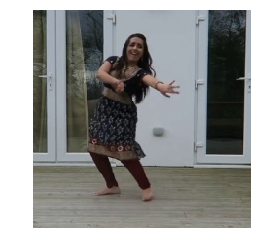

In [269]:
image = cv2.imread('/data/vcl/sid/in_the_w_parsed/center_crops_full/dance_10/crop_params_47_382_245_580_1954.jpg')
%matplotlib inline
plt.imshow(image[:,:,::-1])
plt.axis('off')

In [ ]:
## Good
# dance 0 => 146, 230
# dance 2 => 175, 1037
# dance 3 => 351, 615
# dance 4 => 242
# dance 5 => 222, 343
# dance 7 => 167
# dance 8 => 535
# dance 10 => 2496
# dance 13 => 1217
# dance 115 => 268
# dance 117 => 445
# dance 119 => 564
# dance 120 => 139
# dance 124 => 539
# dance 126 => 780, 628
## Bad
# dance 0 => 1048
# dance 2 => 1209
# dance 3 => 738
# dance 4 => 422
# dance 10 => 2194
# dance 121 => 443
# dance 122 => 4326

<IPython.core.display.Javascript object>


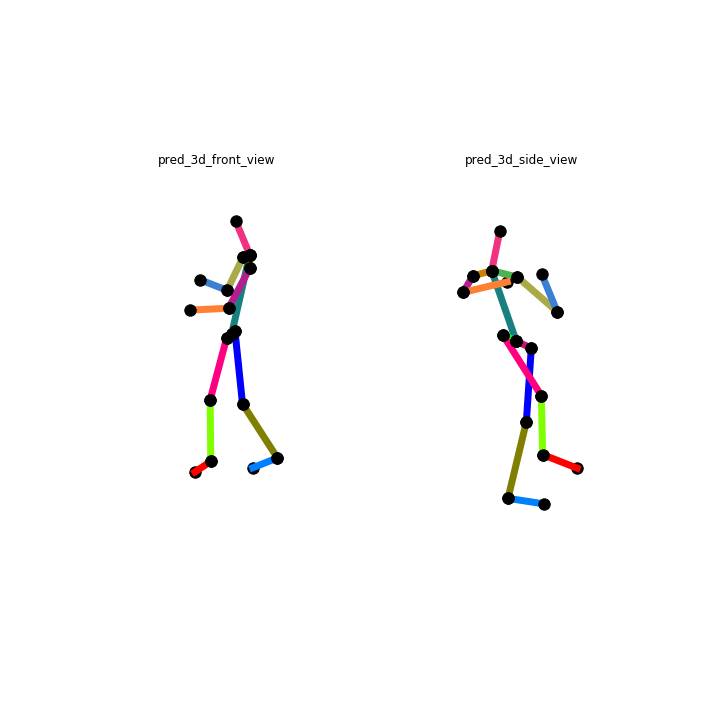

(1.7131634323386358, -2.8012454039126595)
(1.7131634323386358, -2.8012454039126595)


In [154]:
poses_3d = sio.loadmat(poses_3d_path+'/dance_22.mat')['pose_3d']
%matplotlib notebook
%matplotlib notebook
%matplotlib notebook
%matplotlib notebook
skeleton_images = skeleton_to_image(poses_3d[1278:1279])

(-0.5, 223.5, 223.5, -0.5)

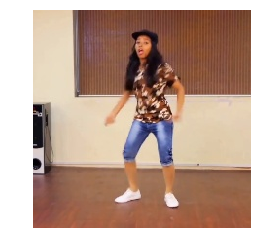

In [283]:
image = cv2.imread('/data/vcl/sid/in_the_w_parsed/center_crops_full/dance_24/crop_params_14_419_246_651_520.jpg')
%matplotlib inline
plt.imshow(image[:,:,::-1])
plt.axis('off')

<IPython.core.display.Javascript object>


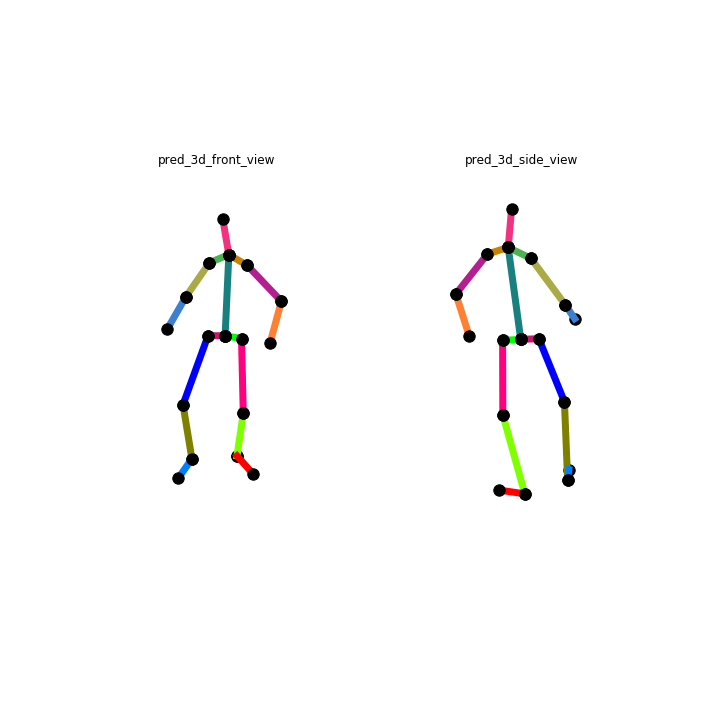

(2.779537807696377, -3.3958182406529347)
(2.779537807696377, -3.3958182406529347)


In [284]:
poses_3d = sio.loadmat('/data/vcl/sid/in_the_w_parsed/poses_3d/dance_24.mat')['pose_3d']
%matplotlib notebook
%matplotlib notebook
%matplotlib notebook
%matplotlib notebook
skeleton_images = skeleton_to_image(poses_3d[520:521])

In [11]:
def plot_points_2d(points, ax):
    ax.scatter(points[:,0], -points[:,1])


def get_ax_2d(fig, az=0, ele=10, subplot='111', size=128):
    ax = fig.add_subplot(subplot)
    ax.set_xlim(0, size)
    ax.set_ylim(-size, 0)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    
    return ax


def modify_ax(ax, title):
    ax.set_title(title)
    # ax.set_xticks([])
    # ax.set_yticks([])
    ax.set_ylabel("")
    ax.set_xlabel("")
    # ax.axis('off')
    
def vis_points(points, num_points, tit, size):
    fig = plt.figure(frameon=False, figsize=(10, 10))

    ax = get_ax_2d(fig, subplot='111', size=size)
    plot_points_2d(points, ax)
    modify_ax(ax, tit)
    for i, txt in enumerate(np.arange(num_points)):
        ax.annotate(txt, (points[i,0], -points[i,1]))
    ax.set_aspect('equal', 'box')

    return fig

In [6]:
import numpy as np
import os
import scipy.io as sio
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import io
from PIL import Image, ImageDraw
from io import BytesIO
import cv2
%matplotlib inline

In [7]:
limb_parents = [0, 0, 1, 2, 3, 1, 5, 6, 1, 0, 9, 10, 11, 0, 13, 14, 15]

In [8]:
def skeleton_image(joints_2d, img):
    img_copy = img.copy()
#     colors = [(0,0,255), (0,255,0), (255,0,0), (255,0,255), (0,255,255), (255,255,0), (127,127,0), (0,127,0), (100,0,100), 
#           (255,0,255), (0,255,0), (0,0,255), (255,255,0), (127,127,0), (100,0,100), (50, 255, 100), (50, 50, 0)]
    
    colors = [(0,0,255), (0,255,0), (255,0,0), (255,0,255), (0,255,255), (255,255,0), (127,127,0), (0,127,0), (100,0,100), 
          (255,0,255), (0,255,0), (0,0,255), (255,255,0), (127,127,0), (100,0,100), (175,100,195), (255,125,25)]
    joints_2d = joints_2d
    for i in range(joints_2d.shape[0]):
        #         ax.text(joints_2d[i, 0], -joints_2d[i, 1], str(i))
        x_pair = [joints_2d[i, 0], joints_2d[limb_parents[i], 0]]
        y_pair = [joints_2d[i, 1], joints_2d[limb_parents[i], 1]]
        img_copy = cv2.line(img_copy, (int(x_pair[0]),int(y_pair[0])), (int(x_pair[1]),int(y_pair[1])), colors[i],4)

    return img_copy[:,:,::-1]

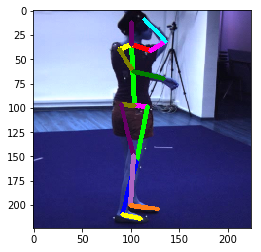

In [21]:
image_size = 512

# pose_mat = '../mads_parsed/parsed_data/poses_2d/HipHop_HipHop1_C0.mat'
# poses_2d = sio.loadmat(pose_mat)['pose_2d']

# img = np.zeros((image_size,image_size,3))
skltn_img = skeleton_image(pose_2d, image)
plt.imshow(skltn_img[:,:,::-1])

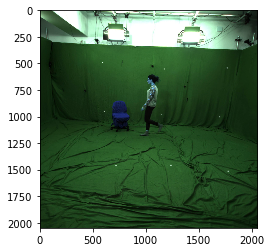

In [34]:
% matplotlib inline
image = cv2.imread('/data/vcl/sid/mpi_parsed/parsed_data/extracted_frames/S1_Seq1_video_8_avi/1000.png')
plt.imshow(image)

In [5]:
poses_2d = sio.loadmat('/data/vcl/sid/mpi_parsed/parsed_data/poses_2d/S1_Seq1_video_8_avi.mat')['pose_2d']

In [9]:
poses_2d.shape

(7699, 28, 2)

<IPython.core.display.Javascript object>


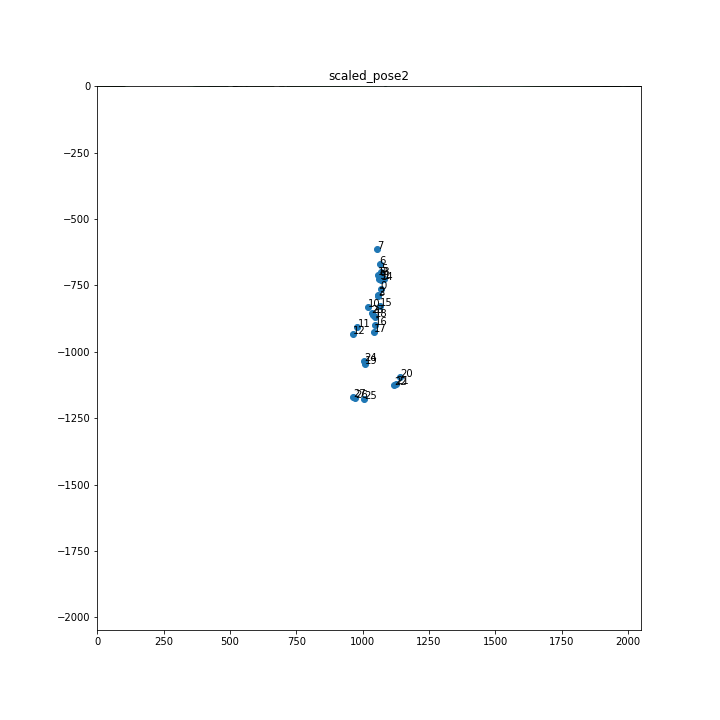

<IPython.core.display.Javascript object>


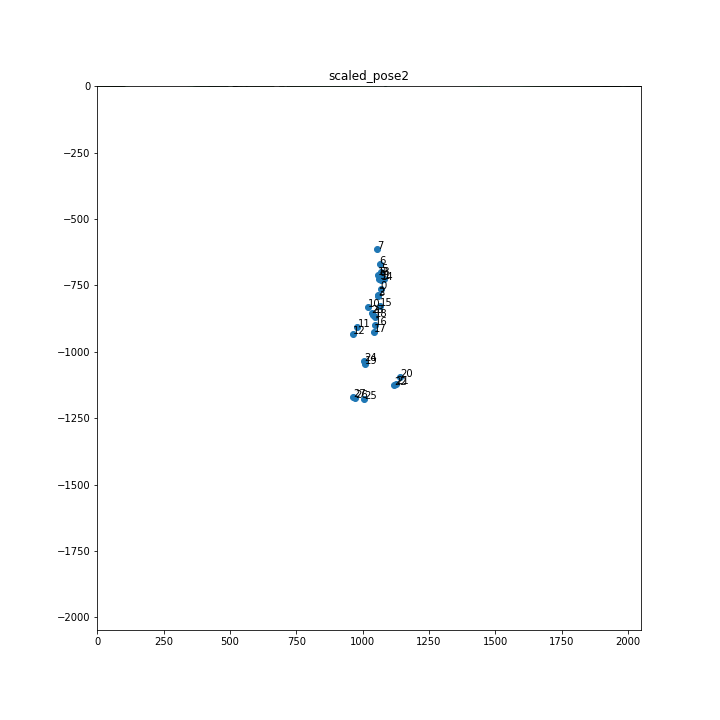

In [30]:
vis_points(poses_2d[1000], 28, 'scaled_pose2', 2048)

In [13]:
poses_2d[0]

array([[1048.46      ,  768.345     ],
       [1052.35      ,  712.811     ],
       [1045.36      ,  809.324     ],
       [1045.15401343,  811.91988755],
       [1036.03      ,  926.994     ],
       [1053.74      ,  673.728     ],
       [1056.        ,  626.481     ],
       [1063.03      ,  532.687     ],
       [1074.23      ,  694.524     ],
       [1115.95      ,  726.298     ],
       [1284.06      ,  744.569     ],
       [1416.43      ,  769.338     ],
       [1463.12      ,  786.177     ],
       [1030.17      ,  692.136     ],
       [ 983.89      ,  705.933     ],
       [ 827.189     ,  722.146     ],
       [ 705.875     ,  723.936     ],
       [ 663.024     ,  724.786     ],
       [1096.345     ,  932.52375   ],
       [1056.03      , 1197.51      ],
       [1036.64      , 1373.22      ],
       [1036.96      , 1405.54      ],
       [1036.04      , 1409.46      ],
       [ 975.715     ,  921.46425   ],
       [ 991.061     , 1191.2       ],
       [1003.01      , 13